# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Цель исследования** - выполнить следующие задачи:
1. Загрузить и подготовить данные.
2. Обучить и проверить модель для каждого региона.
3. Подготовиться к расчёту прибыли.
4. Посчитать риски и прибыль.

**Ход исследования**

Данные мы получим из файлов `/datasets/geo_data_0.csv`, `/datasets/geo_data_1.csv`, `/datasets/geo_data_2.csv`. О качестве данных нам ничего не известно. Значит перед исследовательской работой понадбится обзор данных. Проверим общую информацию, если понадобится, то проведём предобработку данных, чтобы исправить ошибки.

После подготовки данных займёмся построением модели и расчётом прибыли, и рисков.

**Важные условия задачи**

1. Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
2. При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
3. Бюджет на разработку скважин в регионе — 10 млрд рублей.
4. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
5. После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.


## Загрузка и подготовка данных

### Обзор данных

In [1]:
#подключим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler 

In [2]:
#прочитаем 3 csv файла
data_geo_0 = pd.read_csv('/datasets/geo_data_0.csv')#, thousands=",")
data_geo_1 = pd.read_csv('/datasets/geo_data_1.csv')#, thousands=",")
data_geo_2 = pd.read_csv('/datasets/geo_data_2.csv')#, thousands=",")

In [3]:
#выведем первые 5 строк таблиц
data_geo_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
data_geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
#выведем основную информацию о таблицах методом info()
data_geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


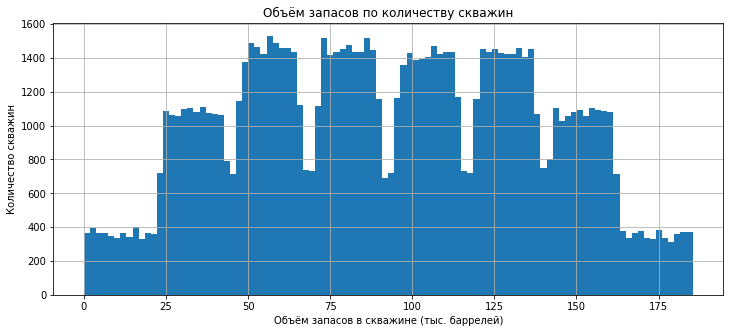

In [9]:
#построим гистограммы для наших таблиц по объёму запасов в скважине
data_geo_0['product'].hist(bins=100, figsize=(12, 5))
plt.xlabel('Объём запасов в скважине (тыс. баррелей)')
plt.ylabel('Количество скважин')
plt.title('Объём запасов по количеству скважин')
plt.show()

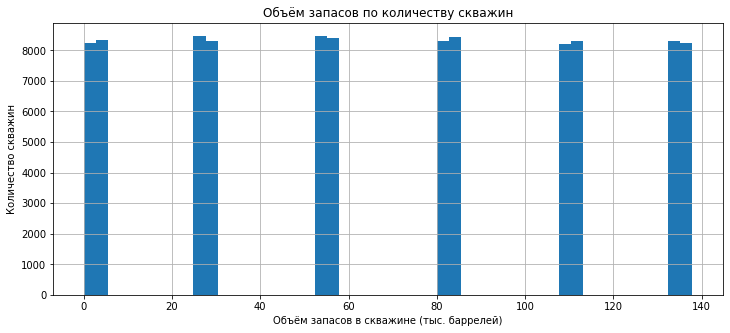

In [10]:
data_geo_1['product'].hist(bins=50, figsize=(12, 5))
plt.xlabel('Объём запасов в скважине (тыс. баррелей)')
plt.ylabel('Количество скважин')
plt.title('Объём запасов по количеству скважин')
plt.show()

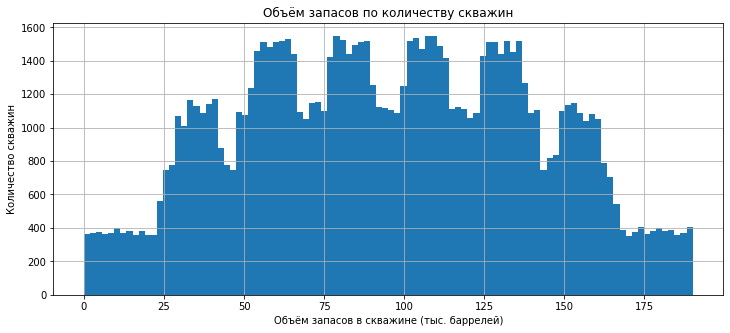

In [11]:
data_geo_2['product'].hist(bins=100, figsize=(12, 5))
plt.xlabel('Объём запасов в скважине (тыс. баррелей)')
plt.ylabel('Количество скважин')
plt.title('Объём запасов по количеству скважин')
plt.show()

**Вывод**

Каждый объект таблиц - данные геологоразведки региона. Столбцы описывают следующую информацию: уникальный идентификатор скважины, три признака точек, объём запасов в скважине. 

Мы видим, что в данных отсутствуют пропуски. 

По гистограммам можно сказать, что распределение объёма запасов по количеству скважин в первом и третьем регионе близко к нормальному. По гистограмме второго региона видно, что данные объёма запасов заполнены странно.

По данным можно сделать вывод, что признак product является для нас ключевым. Он количественный, а значит перед нами задача регрессии.

### Предобработка данных

#### Проверка дубликатов

In [12]:
#проверим наличие дубликатов
display(data_geo_0.duplicated().sum(), data_geo_1.duplicated().sum(), data_geo_2.duplicated().sum())

0

0

0

Дубликаты не обнаружены. Проверим уникальные значения признаков

In [13]:
#посмотрим кол-во уникальных объектов в таблицах
display(data_geo_0.value_counts().count(), data_geo_1.value_counts().count(), data_geo_2.value_counts().count())

100000

100000

100000

In [14]:
# ячейка ревьюера

data_geo_0.nunique()

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Во всех 3х таблицах каждый признак уникален. Соответственно не нужно проводить более глубокую проверку.

#### Удаление ненужного признака

Есть смысл удалить из таблиц признак id. Этот признак никак не повлияет на обучение нашей модели.

In [15]:
#удалим признак id из таблиц
data_geo_0 = data_geo_0.drop(['id'], axis=1)
data_geo_1 = data_geo_1.drop(['id'], axis=1)
data_geo_2 = data_geo_2.drop(['id'], axis=1)

**Вывод**

В ходе небольшой предобработки мы выяснили, что в данных дубликаты отсутствуют и все значения признаков уникальны. Ещё мы удалили ненужный столбец id, который никак не повлияет на обучение модели.

Можно приступить к обучению модели.

## Обучение и проверка модели

### Разделим данные на выборки и проведём масштабирование признаков

In [16]:
#создадим функцию для разделения данных на выборки и масштабирования признаков
def split (data, data_target):
    pd.options.mode.chained_assignment = None
    features = data.drop([data_target], axis=1)
    target = data[data_target]
    numeric = ['f0', 'f1', 'f2']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, train_size=0.75, random_state=42)
    
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return features_train, features_valid, target_train, target_valid

In [17]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split(data_geo_0, 'product')
features_train_1, features_valid_1, target_train_1, target_valid_1 = split(data_geo_1, 'product')
features_train_2, features_valid_2, target_train_2, target_valid_2 = split(data_geo_2, 'product')

In [18]:
print('Размер обучающей выборки:', features_train_0.shape[0],'\n'
      'Размер валидационной выборки:', features_valid_0.shape[0])

Размер обучающей выборки: 75000 
Размер валидационной выборки: 25000


Разделили данные на выборки и провели масштабирование признаков. Можно смело приступать к обучению модели.

### Обучение модели и предсказание

In [19]:
#обучим нашу модель и найдём rmse
def train_model (features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions)**0.5
    
    return rmse, predictions

In [20]:
#сохраним предсказания и ошибку
rmse_0, predictions_0 = train_model(features_train_0, features_valid_0, target_train_0, target_valid_0)
rmse_1, predictions_1 = train_model(features_train_1, features_valid_1, target_train_1, target_valid_1)
rmse_2, predictions_2 = train_model(features_train_2, features_valid_2, target_train_2, target_valid_2)

Посмотрим на среднеквадратичную ошибку в наших таблицах

In [21]:
print('RMSE модели первой таблицы:', rmse_0)
print('RMSE модели второй таблицы:', rmse_1)
print('RMSE модели третьей таблицы:', rmse_2)

RMSE модели первой таблицы: 37.75660035026169
RMSE модели второй таблицы: 0.8902801001028846
RMSE модели третьей таблицы: 40.145872311342174


Теперь посмотрим средний запас предсказанного сырья

In [22]:
print('Средний запас предсказанного сырья в первом регионе:', predictions_0.mean())
print('Средний запас предсказанного сырья в во втором регионе:', predictions_1.mean())
print('Средний запас предсказанного сырья в третьем регионе:', predictions_2.mean())

Средний запас предсказанного сырья в первом регионе: 92.39879990657768
Средний запас предсказанного сырья в во втором регионе: 68.7128780391376
Средний запас предсказанного сырья в третьем регионе: 94.77102387765939


Ради интереса посмотрим на суммарный запас предсказанного сырья и суммарный реальный запас

In [23]:
print('Суммарный запас предсказанного сырья в первом регионе:', predictions_0.sum())
print('Реальный суммарный запас в первом регионе:', target_valid_0.sum())
print('Суммарный запас предсказанного сырья во втором регионе:', predictions_1.sum())
print('Реальный суммарный запас во втором регионе:', target_valid_1.sum())
print('Суммарный запас предсказанного сырья в третьем регионе:', predictions_2.sum())
print('Реальный суммарный запас в третьем регионе:', target_valid_2.sum())

Суммарный запас предсказанного сырья в первом регионе: 2309969.997664442
Реальный суммарный запас в первом регионе: 2308148.909271097
Суммарный запас предсказанного сырья во втором регионе: 1717821.9509784402
Реальный суммарный запас во втором регионе: 1718134.5186806861
Суммарный запас предсказанного сырья в третьем регионе: 2369275.5969414846
Реальный суммарный запас в третьем регионе: 2378774.97679299


Для удобства преобразуем предсказанные и реальные запасы в датафреймы

In [24]:
def data_geo(target, pred):
    data = {'target' : target, 
            'prediction' : pred}
    dataframe = pd.DataFrame(data, columns=['target', 'prediction'])
    return dataframe

new_geo_0 = data_geo(target_valid_0, predictions_0)    
new_geo_1 = data_geo(target_valid_1, predictions_1)
new_geo_2 = data_geo(target_valid_2, predictions_2)

**Вывод**

По полученным данным можно сказать следующее:
1. Лучше всего модель предсказала запасы во втором регионе (RMSE = 0.89), но нужно учитывать, что гистограмма второго региона показала нам, что данные там распределены далеко от нормального.
2. В первом и третьем регионе средние предсказанные запасы близки друг к другу (92 и 94). Во втором средние запасы гораздо ниже (68).
3. Хоть второй регион имеет самый маленький запас сырья, но в нём самая маленькая ошибка. НО можно предположить, что такая маленькая ошибка из-за странного распределения данных. Изучим далее все регионы, но выбирать будем между 1 и 3.

In [25]:
# ячейка ревьюера

data_geo_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


## Подготовка к расчёту прибыли

In [26]:
#создадим константы для всех ключевых значений
budget = 10000000000
points = 500
best_points = 200
barrel_price = 450
product_price = 450000

In [27]:
#цена за бурение одной скважины
one_point_price = budget / best_points
print('Цена за бурение одной скважины:', one_point_price)

Цена за бурение одной скважины: 50000000.0


In [28]:
#рассчитаем достаточный объём сырья для безубыточной разработки новой скважины
target_barrel_point = one_point_price / product_price
print('Объём сырья для безубыточной разработки новой скважины:', target_barrel_point)

Объём сырья для безубыточной разработки новой скважины: 111.11111111111111


In [29]:
print('Реальный средний запас сырья в первом регионе:', data_geo_0['product'].mean())
print('Реальный средний запас сырья во втором регионе:', data_geo_1['product'].mean())
print('Реальный средний запас сырья в третьем регионе:', data_geo_2['product'].mean())

Реальный средний запас сырья в первом регионе: 92.50000000000001
Реальный средний запас сырья во втором регионе: 68.82500000000002
Реальный средний запас сырья в третьем регионе: 95.00000000000004


In [30]:
#создадим функцию для расчёта прибыли
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return product_price * selected.sum() - budget

**Выводы**

Цена за бурение одной скважины составила 50 млн.. Чтобы скважина стала прибыльной, то из неё нужно выработать больше 111 тыс. баррелей. 

По реальным средним запасам сырья можно предположить, что ни один из регионов не будет прибыльным, но если вернуться к гистограммам в начале, то можно заметить, что довольно из большого кол-ва скважин выработается больше 111 тыс. баррелей. 

Даже по странным данным второго региона можно увидеть скважины, которые принесут больше 111 тыс. баррелей, но это слишком рискованно. 

Ещё мы создадли функцию для расчёта прибыли, но она нам пригодится на следующем шаге.

## Расчёт прибыли и рисков 

In [31]:
#с помощью техники bootstrap узнаем среднюю прибыль, доверительный интервал 95% и риск убытка 
state = np.random.RandomState(42)
def bootstrap (target, probs):
    values = []
    count = 0
    for i in range(1000):
        target_sample = target.sample(n=points, replace=True, random_state=state)
        probs_sample = probs[target_sample.index]
        profits = revenue(target_sample, probs_sample, best_points)
        if profits < 0:
            count += 1
        values.append(profits)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = count / 1000 * 100
    return lower, upper, mean, risk

In [32]:
lower_0, upper_0, mean_0, risk_0 = bootstrap(new_geo_0['target'], new_geo_0['prediction'])

print('Первый регион:' '\n'
      'Средняя прибыль первого региона:', mean_0, '\n'
      '95% доверительный интервал: от', lower_0, 'до', upper_0, '\n'
      'Процент риска:', risk_0)

Первый регион:
Средняя прибыль первого региона: 427847560.4625247 
95% доверительный интервал: от -97249829.56859529 до 954215192.7088149 
Процент риска: 5.5


In [33]:
lower_1, upper_1, mean_1, risk_1 = bootstrap(new_geo_1['target'], new_geo_1['prediction'])

print('Второй регион:' '\n'
      'Средняя прибыль второго региона:', mean_1, '\n'
      '95% доверительный интервал: от', lower_1, 'до', upper_1, '\n'
      'Процент риска:', risk_1)

Второй регион:
Средняя прибыль второго региона: 511530218.1485243 
95% доверительный интервал: от 91700564.13644528 до 921455668.3285091 
Процент риска: 0.6


In [34]:
lower_2, upper_2, mean_2, risk_2 = bootstrap(new_geo_2['target'], new_geo_2['prediction'])

print('Третий регион:' '\n'
      'Средняя прибыль третьего региона:', mean_2, '\n'
      '95% доверительный интервал: от', lower_2, 'до', upper_2, '\n'
      'Процент риска:', risk_2)

Третий регион:
Средняя прибыль третьего региона: 408545681.21493566 
95% доверительный интервал: от -120624872.94271684 до 960859440.7253835 
Процент риска: 7.5


**Выводы**

Мы рассчитали 95% доверительный интервал, среднюю прибыль и риски по каждому региону. Можно сделать следующие выводы:
1. Самым хорошим по результатам стал второй регион, но нужно учитывать, что данные были очень странно распределены и средние запасы сырья не очень больше (68.8). Хоть процент риска и указан очень маленьким, но нам нужна скважина, из которой мы точно выкачаем больше 111 тыс. баррелей, а найти такую во втором регионе не очень просто.
2. Если выбирать между 1 и 3 регионом, то 3 гарантированно отсеивается, ибо все показатели лучше.
3. Поскольку нам нужен регион с процентом риска меньше 2.5%, то 1 и 3 регионы мы не берём. Остаётся только второй, но тут нужно быть осторожными.

## Общий вывод

В ходе работы мы:
1. Изучили данные комании «ГлавРосГосНефть».
2. Провели небольшую предобработку данных.
3. Разбили данные на выборки и провели масштабирование признаков.
4. Обучили модели и получили предсказание.
5. Подготовили данные к расчёту прибыли.
6. Рассчитали прибыль и риски.

Нам предоставили данные проб нефти в трёх регионах. Данные были хорошо подготовлены, ибо в них отсутствовали дубликаты и пропуски. В 1 и 3 регионе данные были нормально распределены, а во втором - нет. 

После обучения модели на каждом регионе мы получили следующие результаты: 
1. Cреднеквадратичная ошибка первого региона: 37.75660035026169
2. Cреднеквадратичная ошибка второго региона: 0.8902801001028846
3. Cреднеквадратичная ошибка третьего региона: 40.145872311342174


1. Средний запас предсказанного сырья в первом регионе: 92.39879990657768
2. Средний запас предсказанного сырья в во втором регионе: 68.7128780391376
3. Средний запас предсказанного сырья в третьем регионе: 94.77102387765939

Мы выяснили, что цена за бурение одной скважины составила 50 млн.. Чтобы скважина стала прибыльной, то из неё нужно выработать больше 111 тыс. баррелей.

После мы рассчитали среднюю прибыль, 95% доверительный результат и риски по регионам. Установили, что 1 и 3 регион нам не подходят, ибо их риски > 2.5%. Во втором регионе риск очень маленький, но это может быть связано со странным распределением данных. 

**Итог**

1 и 3 регион нам не подходят из-за высоких рисков, а во втором данные распределены не нормально. Если компания имеет возможность, то лучше рассмотреть другие регионы, чем выбирать из этих трёх